### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [3]:
# Importing the datasets
df = pd.read_csv('/content/drive/MyDrive/Flight_On_Time_Data.csv')


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
df.head()

,Carrier_Name,Year,Quarter,Month,Month_Day,Week_Day,Flight_Date,Airline_DOT_ID,Tail_Number,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Origin_IATA_Code,Origin_City_State,Destination_Airport_ID,Destination_City_Market_ID,Destination_IATA_Code,Destination_City_State,Dep_Time_Block_Group,Scheduled_Departure_Time,Actual_Dep_Time,Dep_Time_Offset,Dep_Delay_Minutes,Dep_Delay_At_Least_15_Minutes,Scheduled_Arrival_Time,Arr_Time_Block_Group,Actual_Arr_Time,Arr_Time_Offset,Arr_Delay_Minutes,Arr_Delay_At_Least_15_Minutes,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay
0,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N851UA,1788,11298,30194,DFW,"Dallas/Fort Worth, TX",11618,31703,EWR,"Newark, NJ",Evening,1926,1933,7,7,0,2359,Night,12,13,13,0,0,0,213,219,162,1,1372,6,NaN,NaN,NaN,NaN,NaN
1,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N37530,1787,11292,30325,DEN,"Denver, CO",13871,33316,OMA,"Omaha, NE",Evening,2051,2130,39,39,1,2316,Night,3,47,47,1,0,0,85,93,65,1,472,2,39.0,0.0,8.0,0.0,0.0
2,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N78509,1786,12892,32575,LAX,"Los Angeles, CA",11042,30647,CLE,"Cleveland, OH",Night,2328,2319,-9,0,0,701,Early Morning,650,-11,0,0,0,0,273,271,249,1,2052,9,NaN,NaN,NaN,NaN,NaN
3,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N47280,1785,10721,30721,BOS,"Boston, MA",12264,30852,IAD,"Washington, DC",Early Morning,600,557,-3,0,0,735,Early Morning,724,-11,0,0,0,0,95,87,69,1,413,2,NaN,NaN,NaN,NaN,NaN
4,United Air Lines Inc.,2023,2,Apr,26,Wednesday,2023-04-26,19977,N826UA,1784,14747,30559,SEA,"Seattle, WA",11292,30325,DEN,"Denver, CO",Morning,1116,1113,-3,0,0,1459,Early Afternoon,1453,-6,0,0,0,0,163,160,129,1,1024,5,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(6777978, 43)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 43 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Carrier_Name                    object 
 1   Year                            int64  
 2   Quarter                         int64  
 3   Month                           object 
 4   Month_Day                       int64  
 5   Week_Day                        object 
 6   Flight_Date                     object 
 7   Airline_DOT_ID                  int64  
 8   Tail_Number                     object 
 9   Flight_Number                   int64  
 10  Origin_Airport_ID               int64  
 11  Origin_City_Market_ID           int64  
 12  Origin_IATA_Code                object 
 13  Origin_City_State               object 
 14  Destination_Airport_ID          int64  
 15  Destination_City_Market_ID      int64  
 16  Destination_IATA_Code           object 
 17  Destination_City_State     

In [9]:
## Assuming that all the null values are 0 (no delay)
df.Carrier_Delay[df.Carrier_Delay.isnull()] = 0
df.Weather_Delay[df.Weather_Delay.isnull()] = 0
df.National_Aviation_System_Delay[df.National_Aviation_System_Delay.isnull()] = 0
df.Security_Delay[df.Security_Delay.isnull()] = 0
df.Late_Aircraft_Delay[df.Late_Aircraft_Delay.isnull()] = 0

In [10]:
df.isna().sum()

,0
Carrier_Name,0
Year,0
Quarter,0
Month,0
Month_Day,0
Week_Day,0
Flight_Date,0
Airline_DOT_ID,0
Tail_Number,0
Flight_Number,0


In [ ]:
### Dividing data into continous and categorical datasets
### We will use this later for feature selections

df2 = df.dtypes
df3 = pd.DataFrame(df2)
print(df3)
df4 = df3.filter(df3.iloc[:,0] == 'object')

# df4 - categorical variables
print(df4.info())

                                      0
Carrier_Name                     object
Year                              int64
Quarter                           int64
Month                            object
Month_Day                         int64
Week_Day                         object
Flight_Date                      object
Airline_DOT_ID                    int64
Tail_Number                      object
Flight_Number                     int64
Origin_Airport_ID                 int64
Origin_City_Market_ID             int64
Origin_IATA_Code                 object
Origin_City_State                object
Destination_Airport_ID            int64
Destination_City_Market_ID        int64
Destination_IATA_Code            object
Destination_City_State           object
Dep_Time_Block_Group             object
Scheduled_Departure_Time          int64
Actual_Dep_Time                   int64
Dep_Time_Offset                   int64
Dep_Delay_Minutes                 int64
Dep_Delay_At_Least_15_Minutes     int64


In [ ]:
df4

""
Carrier_Name
Year
Quarter
Month
Month_Day
Week_Day
Flight_Date
Airline_DOT_ID
Tail_Number
Flight_Number


In [ ]:
df_num = df[df.columns[df.dtypes != 'object']]

In [ ]:
# prompt: Rearrange columns in df_num that Arr_Delay_At_Least_15_Minutes is the 1st column

# Get a list of all column names
cols = df_num.columns.tolist()

# Move 'Arr_Delay_At_Least_15_Minutes' to the first position
cols.insert(0, cols.pop(cols.index('Arr_Delay_At_Least_15_Minutes')))

# Reorder the DataFrame columns
df_num = df_num[cols]


In [ ]:
df_num.head()

,Arr_Delay_At_Least_15_Minutes,Year,Quarter,Month_Day,Airline_DOT_ID,Flight_Number,Origin_Airport_ID,Origin_City_Market_ID,Destination_Airport_ID,Destination_City_Market_ID,Scheduled_Departure_Time,Actual_Dep_Time,Dep_Time_Offset,Dep_Delay_Minutes,Dep_Delay_At_Least_15_Minutes,Scheduled_Arrival_Time,Actual_Arr_Time,Arr_Time_Offset,Arr_Delay_Minutes,Flight_Cancelled,Flight_Diverted,Scheduled_Gate_to_Gate_Time,Actual_Gate_to_Gate_Time,Time_Airborne,Number_of_Flights,Distance_Miles,Distance_Group,Carrier_Delay,Weather_Delay,National_Aviation_System_Delay,Security_Delay,Late_Aircraft_Delay
0,0,2023,2,26,19977,1788,11298,30194,11618,31703,1926,1933,7,7,0,2359,12,13,13,0,0,213,219,162,1,1372,6,0.0,0.0,0.0,0.0,0.0
1,1,2023,2,26,19977,1787,11292,30325,13871,33316,2051,2130,39,39,1,2316,3,47,47,0,0,85,93,65,1,472,2,39.0,0.0,8.0,0.0,0.0
2,0,2023,2,26,19977,1786,12892,32575,11042,30647,2328,2319,-9,0,0,701,650,-11,0,0,0,273,271,249,1,2052,9,0.0,0.0,0.0,0.0,0.0
3,0,2023,2,26,19977,1785,10721,30721,12264,30852,600,557,-3,0,0,735,724,-11,0,0,0,95,87,69,1,413,2,0.0,0.0,0.0,0.0,0.0
4,0,2023,2,26,19977,1784,14747,30559,11292,30325,1116,1113,-3,0,0,1459,1453,-6,0,0,0,163,160,129,1,1024,5,0.0,0.0,0.0,0.0,0.0


<Axes: >

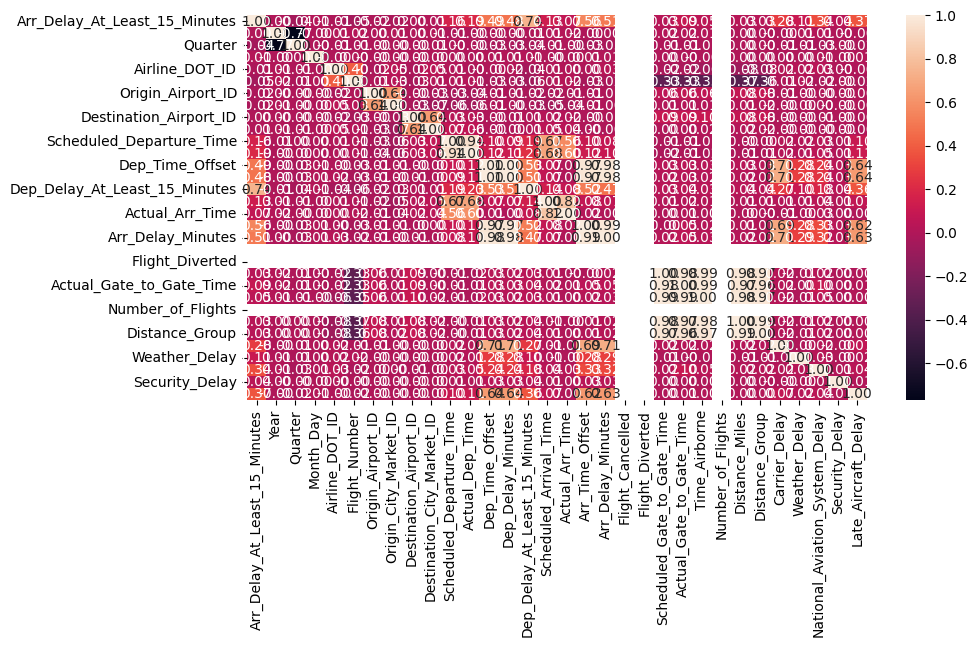

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f")

After we took a closer look at the variables, it's time to chose the variables with the best predictive power.
I suspect that the best categorical variqables will be:

*   Carrier_Name
*   Month
*   Week_Day
*  Dep_Time_Block_Group

Numerical variables with best predictive power:


*   Scheduled_Departure_Time
*   Distnce_Group
*   Month_Day  (?)
*   Dep_Time_Offset




Now I am going to remove columns that "leak the data" or that I won't know ahead of time.

*  Actuall_Dep_Time
*  Dep_Time_Offset                 
*  Dep_Delay_Minutes
*  Arr_Time_Offset                 
*  Arr_Delay_Minutes
*  Actual_Gate_to_Gate_Time
*  Carrier_Delay                   
*  Weather_Delay                   
*  National_Aviation_System_Delay  
*  Security_Delay     
*  Late_Aircraft_Delay      

In [ ]:
drop_col = ['Scheduled_Departure_Time',
'Actual_Dep_Time',
'Dep_Time_Offset',
'Dep_Delay_Minutes',
'Arr_Time_Offset',
'Arr_Delay_Minutes',
'Actual_Gate_to_Gate_Time',
'Carrier_Delay',
'Weather_Delay',
'National_Aviation_System_Delay',
'Security_Delay',
'Late_Aircraft_Delay']

In [ ]:
df_num = df_num.drop(drop_col, axis=1)

<Axes: >

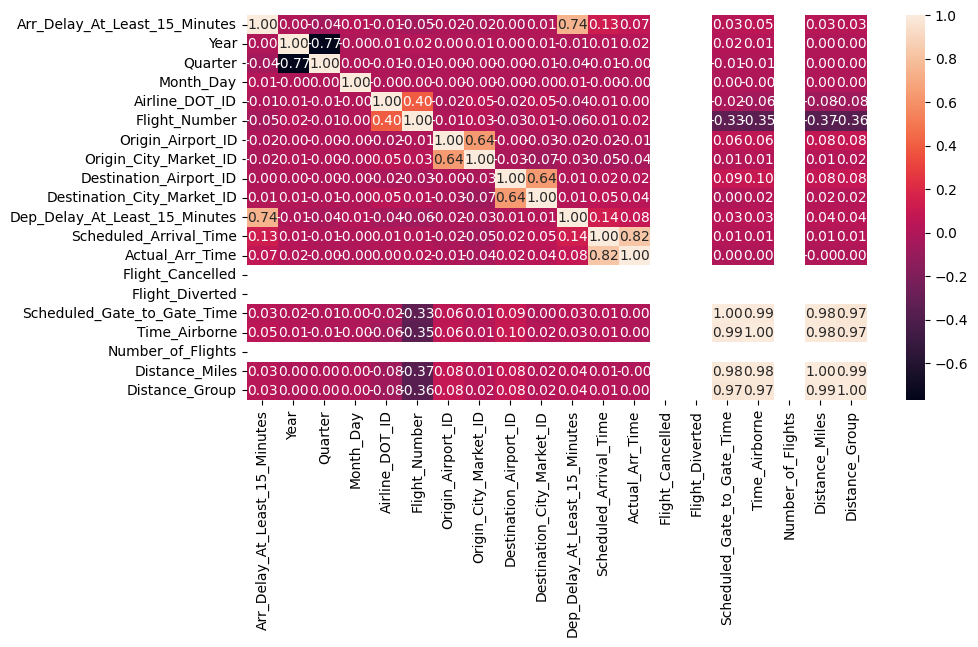

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f")

In [ ]:
ndf = df[['Arr_Delay_At_Least_15_Minutes','Carrier_Name', 'Quarter', 'Month', 'Week_Day','Dep_Time_Block_Group',
'Scheduled_Departure_Time','Distance_Group' ]]

In [ ]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777978 entries, 0 to 6777977
Data columns (total 8 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   Arr_Delay_At_Least_15_Minutes  int64 
 1   Carrier_Name                   object
 2   Quarter                        int64 
 3   Month                          object
 4   Week_Day                       object
 5   Dep_Time_Block_Group           object
 6   Scheduled_Departure_Time       int64 
 7   Distance_Group                 int64 
dtypes: int64(4), object(4)
memory usage: 413.7+ MB


In [ ]:
#import pandas as pd

# Multiple categorical columns
#categorical_cols = ['a', 'b', 'c', 'd']

#pd.get_dummies(data, columns=categorical_cols)

In [ ]:
ndf_cat = ['Carrier_Name','Month','Week_Day','Dep_Time_Block_Group']

In [ ]:
ndf = pd.get_dummies(ndf, columns=ndf_cat)
ndf.head()


,Arr_Delay_At_Least_15_Minutes,Quarter,Scheduled_Departure_Time,Distance_Group,Carrier_Name_Alaska Airlines Inc.,Carrier_Name_Allegiant Air,Carrier_Name_American Airlines Inc.,Carrier_Name_Delta Air Lines Inc.,Carrier_Name_Endeavor Air Inc.,Carrier_Name_Envoy Air,Carrier_Name_Frontier Airlines Inc.,Carrier_Name_Hawaiian Airlines Inc.,Carrier_Name_JetBlue Airways,Carrier_Name_PSA Airlines Inc.,Carrier_Name_Republic Airline,Carrier_Name_SkyWest Airlines Inc.,Carrier_Name_Southwest Airlines Co.,Carrier_Name_Spirit Air Lines,Carrier_Name_United Air Lines Inc.,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Week_Day_Friday,Week_Day_Monday,Week_Day_Saturday,Week_Day_Sunday,Week_Day_Thursday,Week_Day_Tuesday,Week_Day_Wednesday,Dep_Time_Block_Group_Afternoon,Dep_Time_Block_Group_Early Afternoon,Dep_Time_Block_Group_Early Morning,Dep_Time_Block_Group_Evening,Dep_Time_Block_Group_Morning,Dep_Time_Block_Group_Night
0,0,2,1926,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
1,1,2,2051,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
2,0,2,2328,9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,0,2,600,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
4,0,2,1116,5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


Subset we're going to work on is ndf (new data frame)

In [ ]:
ndf.columns

Index(['Arr_Delay_At_Least_15_Minutes', 'Quarter', 'Scheduled_Departure_Time',
       'Distance_Group', 'Carrier_Name_Alaska Airlines Inc.',
       'Carrier_Name_Allegiant Air', 'Carrier_Name_American Airlines Inc.',
       'Carrier_Name_Delta Air Lines Inc.', 'Carrier_Name_Endeavor Air Inc.',
       'Carrier_Name_Envoy Air', 'Carrier_Name_Frontier Airlines Inc.',
       'Carrier_Name_Hawaiian Airlines Inc.', 'Carrier_Name_JetBlue Airways',
       'Carrier_Name_PSA Airlines Inc.', 'Carrier_Name_Republic Airline',
       'Carrier_Name_SkyWest Airlines Inc.',
       'Carrier_Name_Southwest Airlines Co.', 'Carrier_Name_Spirit Air Lines',
       'Carrier_Name_United Air Lines Inc.', 'Month_Apr', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Week_Day_Friday', 'Week_Day_Monday', 'Week_Day_Saturday',
       'Week_Day_Sunday', 'Week_Day_Thursday', 'Week_Day_Tuesday',
       'W

In [ ]:
#those are features selected for the model
xcols = ['Quarter', 'Scheduled_Departure_Time',
       'Distance_Group', 'Carrier_Name_Alaska Airlines Inc.',
       'Carrier_Name_Allegiant Air', 'Carrier_Name_American Airlines Inc.',
       'Carrier_Name_Delta Air Lines Inc.', 'Carrier_Name_Endeavor Air Inc.',
       'Carrier_Name_Envoy Air', 'Carrier_Name_Frontier Airlines Inc.',
       'Carrier_Name_Hawaiian Airlines Inc.', 'Carrier_Name_JetBlue Airways',
       'Carrier_Name_PSA Airlines Inc.', 'Carrier_Name_Republic Airline',
       'Carrier_Name_SkyWest Airlines Inc.',
       'Carrier_Name_Southwest Airlines Co.', 'Carrier_Name_Spirit Air Lines',
       'Carrier_Name_United Air Lines Inc.', 'Month_Apr', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Week_Day_Friday', 'Week_Day_Monday', 'Week_Day_Saturday',
       'Week_Day_Sunday', 'Week_Day_Thursday', 'Week_Day_Tuesday',
       'Week_Day_Wednesday', 'Dep_Time_Block_Group_Afternoon',
       'Dep_Time_Block_Group_Early Afternoon',
       'Dep_Time_Block_Group_Early Morning', 'Dep_Time_Block_Group_Evening',
       'Dep_Time_Block_Group_Morning', 'Dep_Time_Block_Group_Night']